# Multiple Linear Regression

Multiple linear regression is the same as linear regression but the number of independent variables is at least two. The independent variables, a.k.a. explanatory variables, features or thingy that helps me solve my problem, are the observations or data that you've collected in an experiment, survey, etc...

The main idea of linear regression is that you want to fit a line on a series of data points that you have collected (the independent variables) in order to be able to estimate the value of the dependent variable of your problem. The dependent variable is simply the quantity of interest in your particular problem : profit, cost, etc...

We will cover 5 main topics this week :

- Definition and Model Description

- Assumptions and Considerations

- Suitable Research Question

- Case study

- Data Pipeline Implementation

## Definition and Model Description

The definition of a multiple linear model is trying to fit a line on a set of data points using the different independent variables in order to predict the outcome variable. The way that the model is created is most commonly by using the Least Squares approach. 

This is an iterative process where we :

- Draw a line on through the data (if the problem has high dimensions you won't be able to easily visualize it)

- Measure the distance from each data point to the line we created, these are called the residuals. We square those distances, and sum them up. Why do we square the differences ? We could simply take the absolute value, what's the difference ?

- The line is then slightly rotated. Using this the new line we once again measure the residuals, square them and add them up.

- This process is repeated a preditermined number of times ro until a certain threshold is achieved. This is a hyperparameter of the model.

Now that we have our line fitted onto our data, we need to know how good this line will be at predicting the outcome variable. For that we need :

- $R^2$ : Calculates how much of the variation of the dependent variable can be explained by the independent variables. We want this to be large

- F-Score : Is the ratio of the variation explained by our independent variables and the variation not explained by the extra parameters. We want this to be large.

- p-value : Tells us if the results are statistically significant We want this to be small.

$$R^2 = \frac{SS(mean)-SS(fit)}{SS(mean)}$$ where :

- SS(mean) : sum of squares around the mean of the dependent variable. $SS(mean) = (data - mean)^2$

- SS(fit) : sum of the squares around the least squares fit. $SS(fit) = (data - line)^2$

We can also calculate the variance of the fitted line, which is just the average sums of squares for each observation : 

$Var(fit)=\frac{(data-line)^2}{n}=\frac{SS(fit)}{n}$, 

with $n$ the number of observations.




*

*




$$F=\frac{(SS(mean) - SS(fit))/(p_{fit}-p_{mean})}{SS(fit)/(n-p_{fit})}$$ where :

- SS(fit) and SS(mean) are the same as for $R^2$

- p_{fit} : number of parameters in the fitted line. For simple regression it is 2, y-intercept and slope, for multilinear regression it is at least 3.

- p_{mean} : number of parameters in the mean line, usually this is just a y-intercept, so 1.

The $p_{fit}$ and $p_{mean}$ are the degrees of freedom of the model.

$(SS(mean) - SS(fit))/(p_{fit}-p_{mean})$ this is the variance explained by the extra parameters

$SS(fit)/(n-p_{fit})$ variation not explained by the fitted line. It's the sum of squares of the residuals that remain after having fit the new line to the data.

Why do we divide by $n-p_{fit}$ instead of just n ?.... The more parameters we have in the equation the more data we need to estimate them. For a line we need 2 points, for a plane 3 points and so on.

Once we have our F-score, we obtain the p-value by using the parameters of the model and an F-distribution with these parameters to obtain the p-value.



*

*



We can also compare the performance between the multiple regression with the "simple" regression. 

$F=\frac{(SS(simple) - SS(multiple))/(p_{multiple}-p_{simple})}{SS(multiple)/(n-p_{multiple})}$ where :

- $SS(multiple)$ : is the sum of squares of the residuals for the "complex" model.

- $SS(simple)$ : is the sum of squares of the residuals for the "simple" model. Simple here means any model that has fewer independent variables being used.

## Assumptions when dealing with a linear regression problem :

- There is a linear relationship between the independent variables and the outcome/dependent variable.

- The independent variables are not colinear, i.e. aren’t too highly correlated with each other.

- The observations for the dependent variable are selected independently and at random.

- The residuals are normally distributed.

You must check that these assumptions are true before you building your model. 

### How do we check these assumptions ?

### There are essentially five methods of building a multiple linear regression model.

1- Use every variable available

2- Backward elimination : Set a significance level, for example 0.05 and start with all variables and remove the least statistically significant variable (high p-value) and rebuild the model. Then pick the least statistically significant variable and rebuild the model, and repeat until the variables left are all below the significance level.

3- Forward selection 

4- Bidirectional elimination/Stepwise regression

5- Score comparison (uses every model possible and picks best based on score)

*

*

*

Method 1 (use everything) : Use everything.... that's it. 

If you have some domain knowledge you may know that there are certain variables that you can do without, but if you don't use everything. This approach is rarely the way to go, so you should be prepared to use backwards elimination or some other technique to create your model. 

*

*

*

Method 2 (backward elimination): This has a few basic steps.

1- First, you have to set a significance level to keep independent variables. You could set a significance level of 5% (SL = 0.05). This is a hyper parameter and can have big consequences on your model.

2- Next, fit the full model with all variables. Look at the variable with the highest p-value, if it is greater than your significance level.

3a- Remove it if it is higher or if it is below you’re done!

3b- Fit the model without that variable. If you just remove the variable, you need to refit and rebuild the model as this will change the coefficients and constants of your model. Removing one, affects the others.

4- Rinse and repeat, go to step 2, do it all over. and keep doing that until you come to a point where even the highest p-value is < SL. Now your model is ready. All of the variables that are left are less than the significance level.

*

*

*

Method 3 (forward selection): more complex than just reversing backward elimination.

1- Choose a significance level (SL = 0.05).

2- Fit all possible simple regression models and select the one with the lowest P-value.

3- Keep this variable and then fit all possible models with one extra variable. If we selected a simple linear regressor with one variable, now we’d select all of possible models with the variable we already selected and every other variable left.

4- Find the predictor with the lowest p-value, if p-value < Sl, rinse and repear. Go back to step 3, otherwise, you’re done!

Stop when p-value < SL is no longer true which means that the variable is not significant anymore. You won’t keep the current model, you’ll keep the previous one because the final model the new variable is insignificant.

*

*

*

Method 4 (bidirectional elimination): This method combines the previous two!

1- Select a significance level to enter and a significance level to stay (SLENTER = 0.05, SLSTAY = 0.05).

2- Perform the next step of forward selection where you add the new variable. You need to have your p-value be less than SLENTER.

3- Now perform all of the steps of backward elimination. The variables must have a P-value less than SLSTAY in order to stay.

4- Now head back to step two, then move forward to step 3, and so on until no new variables can enter and no new variables can exit.

*

*

*

Method 5 (score comparison): Here, you’re going to be looking at all possible methods. You’ll look at a comparison of the scores for all of the possible methods. This is definitely the most resource-consuming approach!

1- Select a criterion of goodness of fit

2- Construct all possible regression models

3- Select the one with the best criterion

## Suitable research question :

Multiple linear regression is a valid method only if : 

- The outcome variable has a continuous value

- The outcome variable has a linear or quasi-linear behavior

- There exists a linear or quai-linear behavior between the independent variables and the outcome variable

## Case study :

Let's look at an example of predicting housing prices using multiple linear regression.

In [4]:
import folium
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import linear_model
# from folium.plugins import HeatMap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline


#Import the data
df = pd.read_csv('house_pricing.csv')

df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
#We don't care about id or date columns :
df.drop(['id','date'], axis=1, inplace=True)

# Let's look at the types and values we have :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [6]:
#Unique values in the data
df.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [7]:
# Create a dataframe to store all of our metrics for the models
evaluation = pd.DataFrame({'Model': [],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Let's check our assumptions first :

- There is a linear relationship between the independent variables and the outcome/dependent variable.

- The independent variables are not colinear, i.e. aren’t too highly correlated with each other.

- The observations for the dependent variable are selected independently and at random.

- The residuals are normally distributed.

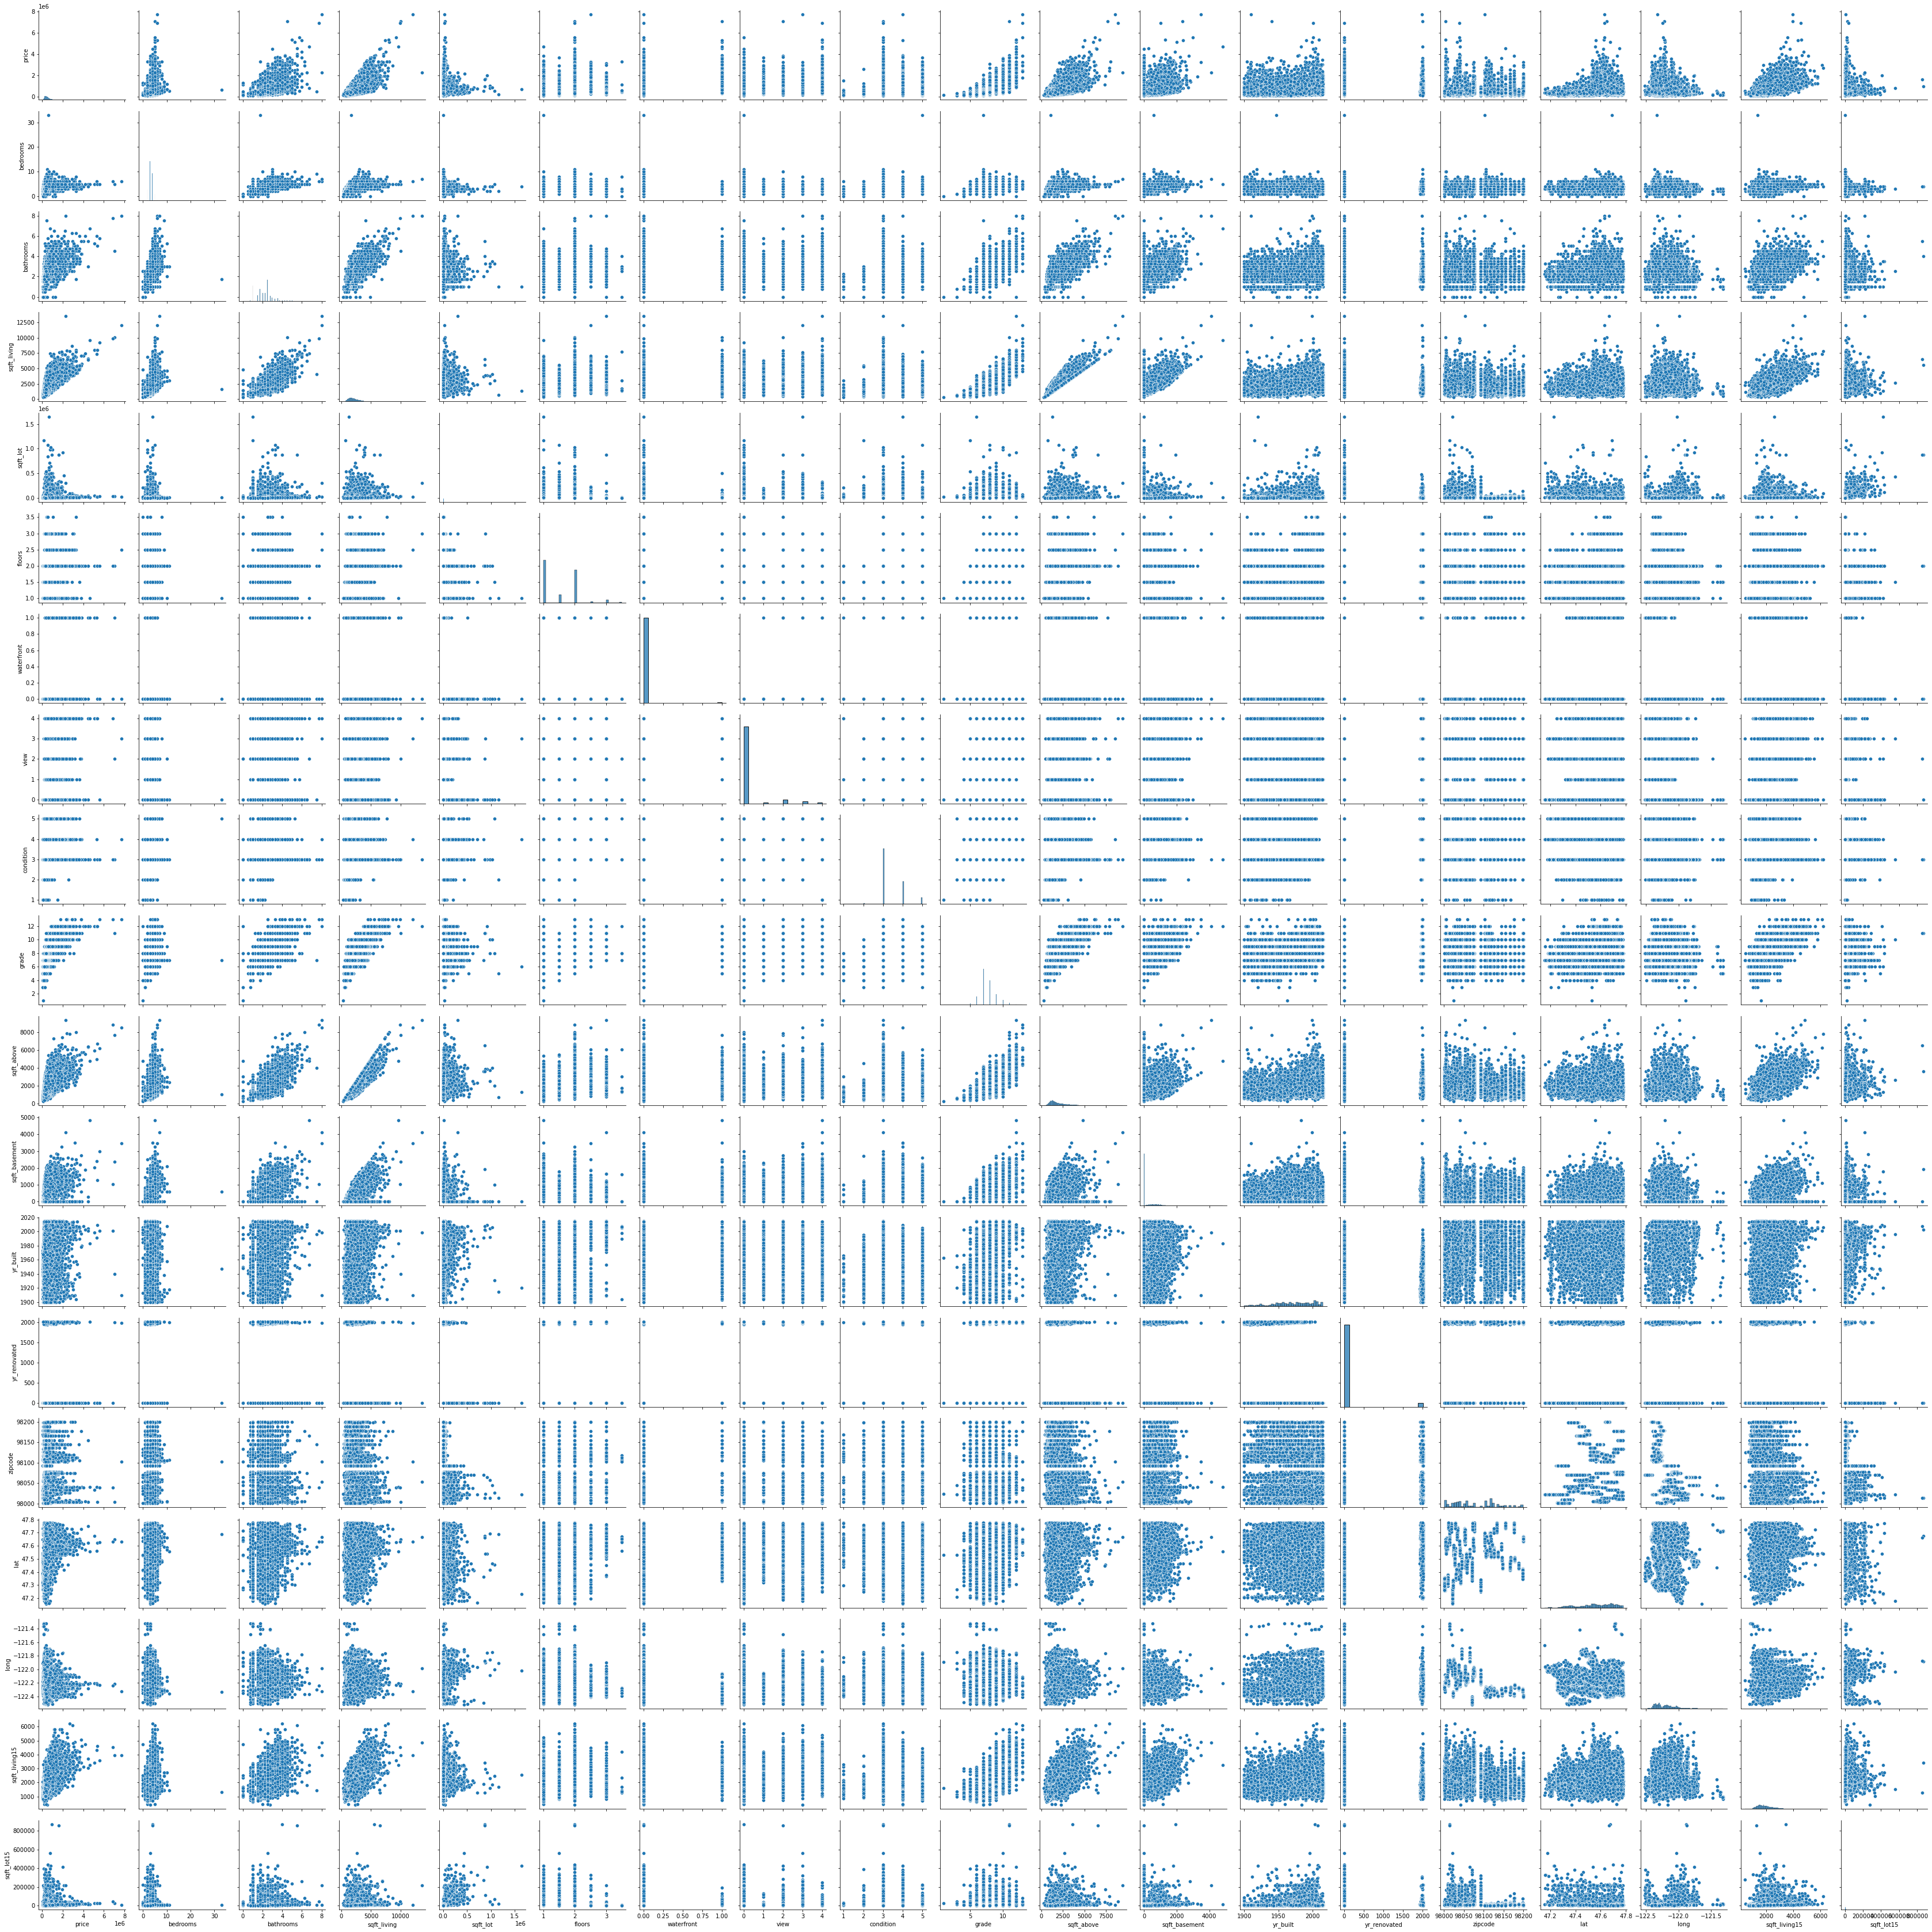

In [8]:
# If we have a few features we can use a seaborn's pairplot :
sns.pairplot(df)

In [9]:
#We can drop sqft_lot and sqft_lot15 :
red_df = df.drop(['sqft_lot', 'sqft_lot15'], axis=1)
red_df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530
21609,400000.0,4,2.50,2310,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830
21610,402101.0,2,0.75,1020,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020
21611,400000.0,3,2.50,1600,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410


<AxesSubplot:title={'center':"Pearson's Correlation Matrix"}>

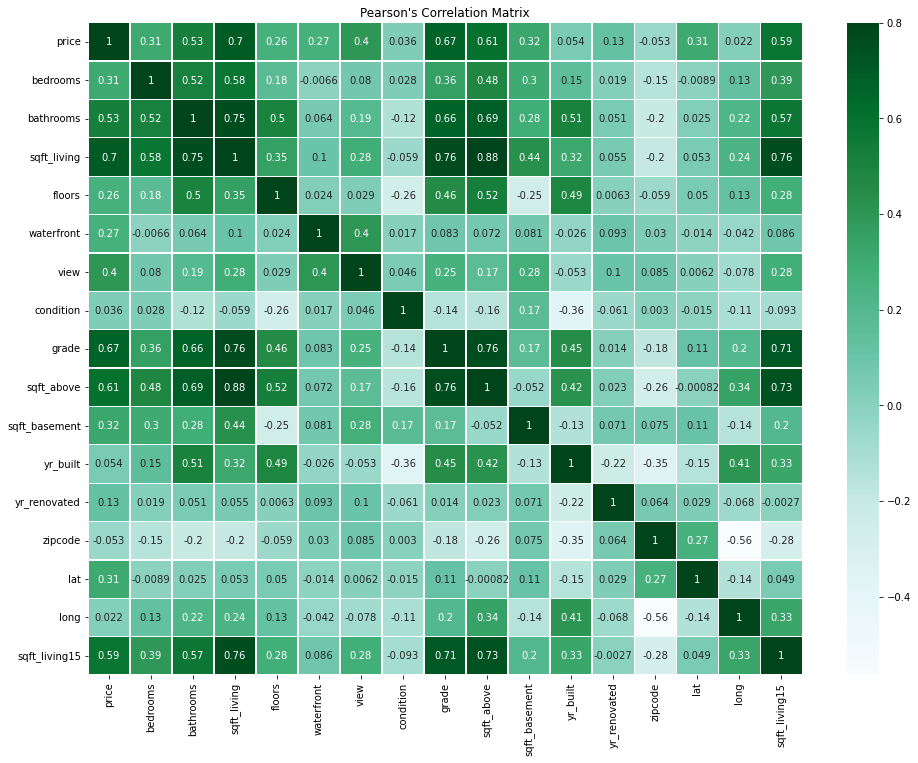

In [10]:
#Let's look at the correlation between variables :
f, ax = plt.subplots(figsize=(16, 12))
plt.title("Pearson's Correlation Matrix")

sns.heatmap(red_df.corr(), cmap="BuGn", linewidths=0.25, linecolor='w', vmax = 0.8, annot=True)

In [11]:
# We know that we can drop either sqft_above or sqft_living :
red_df = red_df.drop('sqft_above', axis=1)
red_df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690
2,180000.0,2,1.00,770,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720
3,604000.0,4,3.00,1960,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360
4,510000.0,3,2.00,1680,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530
21609,400000.0,4,2.50,2310,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830
21610,402101.0,2,0.75,1020,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020
21611,400000.0,3,2.50,1600,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410


In [12]:
#Naive implementation, using our domain knowledge :
train_data,test_data = train_test_split(df, train_size = 0.7, random_state=1)

# We select some features we think are important :
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

#We create our regression model
reg_model_1 = linear_model.LinearRegression()

#We fit the data :
reg_model_1.fit(train_data[features],train_data['price'])

#Let's look at our values for the intercept and the coefficients :
print('Intercept: {}'.format(reg_model_1.intercept_))
print('Coefficients: {}'.format(reg_model_1.coef_))

#Let's define our own adjusted R-squared function :
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

Intercept: -58133839.43094294
Coefficients: [-5.34839470e+04  1.15675487e+04  3.07710868e+02 -2.88151427e-01
 -1.19979414e+03  5.93343570e+02]


In [13]:
#Let's calculate the Root Mean Squared Error on the test data
pred = reg_model_1.predict(test_data[features])

rmse = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))

#Let's calculate the R-squared value for the training data set :
rtr = float(format(reg_model_1.score(train_data[features],train_data['price']),'.3f'))

#Let's calculate the adjusted R-squared value for the training data set :
artr = float(format(adjustedR2(reg_model_1.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))

#Let's calculate the R-squared value for the test data set :
rte = float(format(reg_model_1.score(test_data[features],test_data['price']),'.3f'))

#Let's calculate theadjusted R-squared value for the test data set :
arte = float(format(adjustedR2(reg_model_1.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))

#For good measure we'll throw in cross-validation as well :
cv = float(format(cross_val_score(reg_model_1,df[features],df['price'],cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Prior knowledge selected features',rmse,rtr,artr,rte,arte,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Prior knowledge selected features,272537.817,0.51,0.51,0.524,0.524,0.512


In [ ]:
#Let's now use the variables that we selected :
train_data_red, test_data_red = train_test_split(red_df, train_size = 0.7, random_state=1)

#We create our regression model
reg_model_2 = linear_model.LinearRegression()

#We fit the data :
reg_model_2.fit(train_data_red.drop('price', axis=1), train_data_red['price'])

#Let's look at our values for the intercept and the coefficients :
print('Intercept: {}'.format(reg_model_2.intercept_))
print('Coefficients: {}'.format(reg_model_2.coef_))

Intercept: 3364531.2561233835
Coefficients: [-3.17661162e+04  3.79913633e+04  1.74721711e+02  1.04663119e+04
  5.63229093e+05  5.14237269e+04  2.65929704e+04  9.55199355e+04
 -3.23083496e+01 -2.54401422e+03  2.16737976e+01 -5.55141133e+02
  6.15987627e+05 -2.13711554e+05  1.88028807e+01]


In [ ]:
#Let's calculate the Root Mean Squared Error on the test data
pred2 = reg_model_2.predict(test_data_red.drop('price', axis=1))

#Let's calculate the R-squared value for the training data set :
rmse2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_red['price'],pred2)),'.3f'))

#Let's calculate the R-squared value for the training data set :
rtr2 = float(format(reg_model_2.score(train_data_red.drop('price', axis=1),train_data['price']),'.3f'))

#Let's calculate the adjusted R-squared value for the training data set :
artr2 = float(format(adjustedR2(reg_model_2.score(train_data_red.drop('price', axis=1),train_data['price']),train_data_red.drop('price', axis=1).shape[0],len(train_data_red.drop('price', axis=1).columns)),'.3f'))

#Let's calculate the R-squared value for the test data set :
rte2 = float(format(reg_model_2.score(test_data_red.drop('price', axis=1),test_data_red['price']),'.3f'))

#Let's calculate theadjusted R-squared value for the test data set :
arte2 = float(format(adjustedR2(reg_model_2.score(test_data_red.drop('price', axis=1),test_data_red['price']),test_data_red.drop('price', axis=1).shape[0],len(test_data_red.drop('price', axis=1).columns)),'.3f'))

#For good measure we'll throw in cross-validation as well :
cv2 = float(format(cross_val_score(reg_model_2,test_data_red.drop('price', axis=1),test_data_red['price'],cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Filter selected features',rmse2,rtr2,artr2,rte2,arte2,cv2]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Filter selected features,219981.777,0.704,0.703,0.690,0.689,0.687
0,Prior knowledge selected features,272537.817,0.510,0.510,0.524,0.524,0.512


In [ ]:
#Let's now use the variables that we selected :
train_data_red, test_data_red = train_test_split(df, train_size = 0.7, random_state=1)

#We create our regression model
reg_model_3 = linear_model.LinearRegression()

#We fit the data :
reg_model_3.fit(train_data_red.drop('price', axis=1), train_data_red['price'])

#Let's look at our values for the intercept and the coefficients :
print('Intercept: {}'.format(reg_model_2.intercept_))
print('Coefficients: {}'.format(reg_model_2.coef_))

Intercept: 3364531.2561233835
Coefficients: [-3.17661162e+04  3.79913633e+04  1.74721711e+02  1.04663119e+04
  5.63229093e+05  5.14237269e+04  2.65929704e+04  9.55199355e+04
 -3.23083496e+01 -2.54401422e+03  2.16737976e+01 -5.55141133e+02
  6.15987627e+05 -2.13711554e+05  1.88028807e+01]


In [ ]:
#Let's calculate the Root Mean Squared Error on the test data
pred3 = reg_model_3.predict(test_data_red.drop('price', axis=1))

#Let's calculate the R-squared value for the training data set :
rmse3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_red['price'],pred3)),'.3f'))

#Let's calculate the R-squared value for the training data set :
rtr3 = float(format(reg_model_3.score(train_data_red.drop('price', axis=1),train_data['price']),'.3f'))

#Let's calculate the adjusted R-squared value for the training data set :
artr3 = float(format(adjustedR2(reg_model_3.score(train_data_red.drop('price', axis=1),train_data['price']),train_data_red.drop('price', axis=1).shape[0],len(train_data_red.drop('price', axis=1).columns)),'.3f'))

#Let's calculate the R-squared value for the test data set :
rte3 = float(format(reg_model_3.score(test_data_red.drop('price', axis=1),test_data_red['price']),'.3f'))

#Let's calculate theadjusted R-squared value for the test data set :
arte3 = float(format(adjustedR2(reg_model_3.score(test_data_red.drop('price', axis=1),test_data_red['price']),test_data_red.drop('price', axis=1).shape[0],len(test_data_red.drop('price', axis=1).columns)),'.3f'))

#For good measure we'll throw in cross-validation as well :
cv3 = float(format(cross_val_score(reg_model_3,test_data_red.drop('price', axis=1),test_data_red['price'],cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Every feature',rmse3,rtr3,artr3,rte3,arte3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Filter selected features,219981.777,0.704,0.703,0.690,0.689,0.687
2,Every feature,219788.463,0.704,0.704,0.690,0.690,0.687
0,Prior knowledge selected features,272537.817,0.510,0.510,0.524,0.524,0.512


## Polynomial regression :

Once again linear models, we want to fit a straight line on the data. However, sometimes the data has a quadratic distribution, creating a quadratic function and applying a polynomial transformation might be a good way to go. This time the hypothesis function is defined as

$$h_{\theta}(X)={\theta}_0+{\theta}_1x+{\theta}_2x^2+...+{\theta}_nx^n$$
 

We should be very careful when choosing the degree of our terms because it migh cause overfitting. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#Naive implementation, using our domain knowledge :
train_data,test_data = train_test_split(df, train_size = 0.7, random_state=1)

# We select some features we think are important :
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

# We create a polynomial regression object
polyfeat = PolynomialFeatures(degree=2)

# Fit our model onto the data :
X_everything = polyfeat.fit_transform(df[features])
X_trpoly = polyfeat.fit_transform(train_data[features])
X_tepoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trpoly, train_data['price'])

pred1 = poly.predict(X_tepoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trpoly,train_data['price']),'.3f'))
rtepoly1 = float(format(poly.score(X_tepoly,test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_everything,df['price'],cv=5).mean(),'.3f'))


r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression degree=2 prior knowledge selected features',
                          rmsepoly1, rtrpoly1,'-',rtepoly1,'-',cv1]

In [ ]:
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Filter selected features,219981.777,0.704,0.703,0.690,0.689,0.687
2,Every feature,219788.463,0.704,0.704,0.690,0.69,0.687
3,Polynomial Regression degree=2 prior knowledge...,257309.001,0.562,-,0.576,-,0.540
0,Prior knowledge selected features,272537.817,0.510,0.51,0.524,0.524,0.512


### Last but not least, we can also do everything we did, with some additional features, using statsmodels package 

In [ ]:
import statsmodels.api as sm
from sklearn import datasets 

data = datasets.load_boston()

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
import numpy as np
import pandas as pd

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [ ]:
## Without a constant

import statsmodels.api as sm

X = df["RM"] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 13 May 2020   Prob (F-statistic):           2.49e-74
Time:                        20:06:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Data pipeline implementation will be the homework ! :)

# Additional ressources :

Great website with an interactive window for neural networks found [here](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.81123&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). For those of you who are planning on doing your projects with some machine learning in it, you might find the website helpful for a demonstration.

In [ ]:
#Let's do our train-test split :
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

In [ ]:
# We then create our linear regression object :
lr = linear_model.LinearRegression()

# and fit our model :
lr.fit(X_train,y_train)

In [ ]:
# We can now calculate our different metrics to know how good our model is :
pred = lr.predict(X_test)

rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

In [ ]:
#Let's look at our simple model :
plt.figure()
plt.scatter(X_test,y_test,color='blue',label="Data", alpha=.2)
plt.plot(X_test,lr.predict(X_test),color="red",label="Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.legend()